In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-01-11 01:01:52--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2024-01-11 01:01:52 (131 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
#Replace categorical data to numbers
dataset = dataset.replace({"male": 0, "female": 1, "yes": 1, "no": 0, "northwest": 0, "northeast": 1, "southeast": 2, "southwest": 3 })

#create the train and test
train_dataset = dataset.sample(frac=0.8)
test_dataset = dataset.sample(frac=0.2)

train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

print(train_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 1158 to 661
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   int64  
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   int64  
 5   region    1070 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 58.5 KB
None


In [4]:
train_dataset, train_labels

(      age  sex   bmi  children  smoker  region
 1158   20    1  30.6         0       0       1
 923    34    0  35.8         0       0       0
 356    46    0  43.9         3       0       2
 970    50    1  28.2         3       0       2
 134    20    1  28.8         0       0       1
 ...   ...  ...   ...       ...     ...     ...
 70     27    1  24.8         0       1       2
 539    53    0  31.4         0       0       2
 300    36    0  27.6         3       0       1
 770    61    0  36.1         3       0       3
 661    57    1  24.0         1       0       2
 
 [1070 rows x 6 columns],
 1158     2459.72
 923      4320.41
 356      8944.12
 970     10702.64
 134      2457.21
           ...   
 70      16577.78
 539     27346.04
 300      6746.74
 770     27941.29
 661     22192.44
 Name: expenses, Length: 1070, dtype: float64)

In [17]:
#create the model
model = keras.Sequential([
    layers.Dense(124, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

#compile
optimizer = tf.keras.optimizers.RMSprop(0.01)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 124)               868       
                                                                 
 dense_21 (Dense)            (None, 128)               16000     
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33509 (130.89 KB)
Trainable params: 33509 (130.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#fit the model
model.fit(train_dataset, train_labels, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 170409184.0000 - mae: 9783.8701 - mse: 170409184.0000
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 134418864.0000 - mae: 9203.7871 - mse: 134418864.0000
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 133168280.0000 - mae: 9268.7881 - mse: 133168280.0000
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 128812736.0000 - mae: 9034.8008 - mse: 128812736.0000
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 122121080.0000 - mae: 8775.1406 - mse: 122121080.0000
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 106896176.0000 - mae: 8181.6123 - mse: 106896176.0000
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 81501656.0000 - mae: 6897.7881 - mse: 81501656.0000
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 60900780.0000 - mae: 5826.2227 - mse: 60

9/9 - 0s - loss: 22608744.0000 - mae: 2952.0239 - mse: 22608744.0000 - 151ms/epoch - 17ms/step
Testing set Mean Abs Error: 2952.02 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


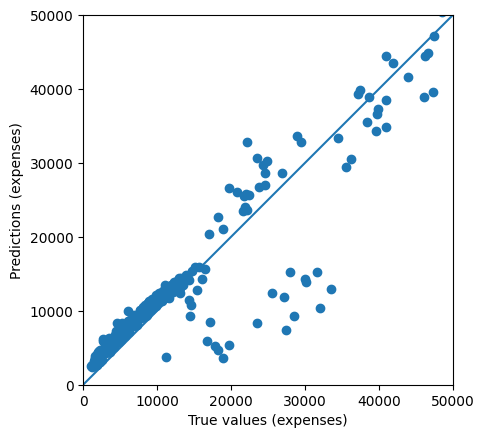

In [19]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
